In [27]:
%matplotlib inline

In [28]:
# yellowbrick.model_selection.CVScores
#
#
# Author:   Prema Damodaran Roman

#
# Copyright (C) 2018 District Data Labs
# For license information, see LICENSE.txt
#
# ID: CVScores.py [7f47800] pdamodaran@users.noreply.github.com $

In [29]:
##########################################################################
## Imports
##########################################################################

import warnings
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from yellowbrick.base import ModelVisualizer
from sklearn.model_selection import cross_val_score

In [30]:
class CVScores(ModelVisualizer):
    """
    CVScores displays cross validation scores as a bar chart and the 
    average of the scores as a horizontal line
    """
    def __init__(self, model, ax=None, cv=None, scoring=None, **kwargs):    
        """
        Initialize the visualization with many of the options required
        in order to make most visualizations work.
        
        These parameters can be influenced later on in the visualization
        process, but can and should be set as early as possible.
        
        Parameters
        ---------- 
        
        model : a scikit-learn estimator
            An object that implements ``fit`` and ``predict``, can be a
            classifier, regressor, or clusterer so long as there is also a valid
            associated scoring metric.
            Note that the object is cloned for each validation.
        
        ax : matplotlib.Axes object, optional
            The axes object to plot the figure on.
        
        cv : int, cross-validation generator or an iterable, optional
            Determines the cross-validation splitting strategy.
            Possible inputs for cv are:
              - None, to use the default 3-fold cross-validation,
              - integer, to specify the number of folds.
              - An object to be used as a cross-validation generator.
              - An iterable yielding train/test splits.
        
            see the scikit-learn
            `cross-validation guide <http://scikit-learn.org/stable/modules/cross_validation.html>`_
            for more information on the possible strategies that can be used here.
        
        scoring : string, callable or None, optional, default: None
            A string or scorer callable object / function with signature
            ``scorer(estimator, X, y)``. 
        
            See scikit-learn model evaluation documentation for names of possible metrics.
        
        kwargs : dict
            Keyword arguments that are passed to the base class and may influence
            the visualization as defined in other Visualizers.            
        
        """
        super(CVScores, self).__init__(model, ax=ax, **kwargs)
        
        self.cv = cv
        self.scoring=scoring
        
    def fit(self, X, y, **kwargs):
        """
        Fits the learning curve with the wrapped model to the specified data.
        Draws training and test score curves and saves the scores to the
        estimator.
        
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training vector, where n_samples is the number of samples and
            n_features is the number of features.
            
        y : array-like, shape (n_samples) or (n_samples, n_features), optional
            Target relative to X for classification or regression;
            None for unsupervised learning.
            
        Returns
        -------
        self : instance
            
        """
            
        self.cv_scores_ = cross_val_score(self.estimator, X, y, cv=self.cv, scoring=self.scoring)
        self.cv_scores_mean_ = np.mean(self.cv_scores_)
        
        self.draw()
        return self
    
    def draw(self, **kwargs):
        """
            displays the bar chart of cv scores
        """
        fig = plt.figure()
        fig, ax = plt.subplots()
        self.fig = fig
        self.ax = ax
        minimum = min(self.cv_scores_)
        if minimum > 0.05:
            minimum = minimum - 0.05 
        plt.ylim(minimum, 1)
        xvals = range(1, len(self.cv_scores_) + 1, 1)
        width = kwargs.pop("width", 0.3)
        self.ax.bar(xvals, self.cv_scores_, width = width)
        color = kwargs.pop("color", "b")
        linewidth = kwargs.pop("linewidth", 1)
        self.ax.axhline(self.cv_scores_mean_, color=color, label='Average', linestyle='--', linewidth=linewidth)
        
        return self.ax
        
    def finalize(self, **kwargs):
        """
        Add the title, legend, and other visual final touches to the plot.
        """
        # Set the title of the figure
        self.set_title('Cross Validation Scores')
        #self.set_title('Cross Validation Scores for {}'.format(self.name))
        
         # Add the legend
        loc = kwargs.pop("loc", "best")
        edgecolor = kwargs.pop("edgecolor", "k")
        self.ax.legend(frameon=True, loc=loc, edgecolor=edgecolor)

        #set spacing between the x ticks
        self.ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        
        # Set the axis labels
        self.ax.set_xlabel('Training Instances')
        self.ax.set_ylabel('Score')
        
    

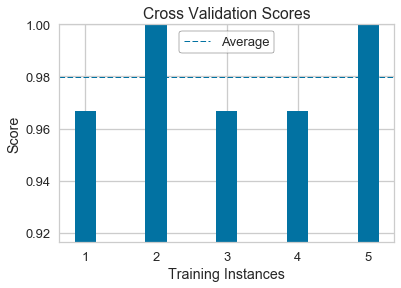

In [31]:
#example 1
from sklearn.model_selection import KFold, cross_val_score, ShuffleSplit, StratifiedKFold
from sklearn import datasets, svm, linear_model 

iris = datasets.load_iris()
clf = svm.SVC(kernel='linear', C=1)

#scores = cross_val_score(clf, iris.data, iris.target, cv=5)
X = iris.data
y = iris.target

visualizer = CVScores(model=clf, cv=5, scoring='f1_macro')
visualizer.fit(X,y)
g = visualizer.poof()


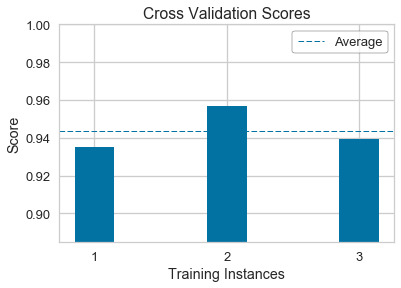

In [32]:
#Example 2
#example 1 - using k_fold
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
k_fold = KFold(n_splits=3)
svc = svm.SVC(C=1, kernel='linear')
cross_val_score(svc, X_digits, y_digits, cv=k_fold, n_jobs=-1)

visualizer = CVScores(model=svc, cv=k_fold, scoring='f1_macro')
visualizer.fit(X_digits,y_digits)
g = visualizer.poof()